In [26]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.image as mping

Number Of Players    :  15
Number Of Total Images Present    :  576


Distribution Per Player


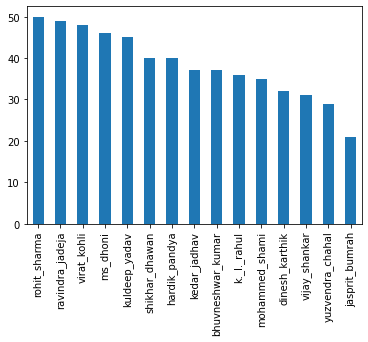

In [2]:
data = pd.read_csv("C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/players.csv")
data = data.sample(frac=1).reset_index(drop=True)

lab = preprocessing.LabelEncoder()
lab.fit(data['player'])
data['player_trans'] = lab.transform(data['player'])

n = int(len(data))
players = data.player.nunique()
print("Number Of Players    : ",players)
print("Number Of Total Images Present    : ",n)
print("\n\nDistribution Per Player")
data['player'].value_counts().plot.bar()

data = data[:-6]
test_data = data[-6:]

Distribution Per Player


<AxesSubplot:>

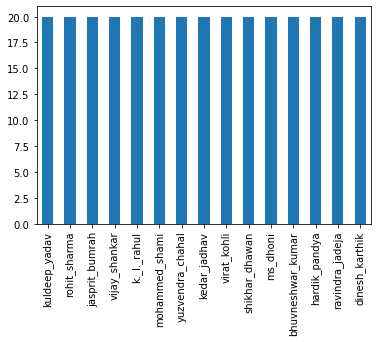

In [3]:
for index,row in data.iterrows():
    if len(data[data['player']==row['player']])>20:
        data.drop(data[data['image']==row['image']].index , inplace=True)

print("Distribution Per Player")
data['player'].value_counts().plot.bar()

In [4]:
load_model = keras.models.load_model("Evolv_ML.h5")

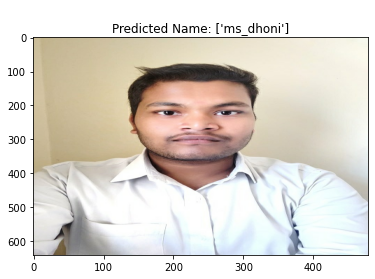

In [14]:
i=0
def load_test_img(image,player,player_transf):
    path = "C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/images/"+player+"/"+image
    img = tf.io.decode_jpeg(tf.io.read_file(path),channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224,500])
    img = keras.applications.mobilenet_v2.preprocess_input(img)
    return img
test_ds = tf.data.Dataset.from_tensor_slices((test_data.image.values,test_data.player.values,test_data.player_trans.values))
test_ds = test_ds.map(load_test_img).batch(6)
prediction = load_model.predict(test_ds)

#for index,row in test_data.iterrows():
img = tf.io.decode_jpeg(tf.io.read_file("C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/Anshu/ME.jpg"),channels=3)
imgplot = plt.imshow(img.numpy().astype("uint8"),aspect='auto')
real = str(list(lab.classes_)[row['player_trans']])
top_k_values, top_k_indices = tf.nn.top_k(prediction[i], k=3)
top_k_names = []
for k in range(1):
    top_k_names+=[str(list(lab.classes_)[top_k_indices[k]])]
plt.title("\nPredicted Name: "+str(top_k_names))
plt.show()
i+=1

In [17]:
test_data.head(20)

,id,image,player,player_trans
564,326,b94188512a.jpg,rohit_sharma,10
565,110,36df32feb1.jpg,jasprit_bumrah,3
566,182,12b63caa09.jpg,yuzvendra_chahal,14
567,259,8c3e367fc4.jpg,jasprit_bumrah,3
568,444,cb188ffb63.jpg,ms_dhoni,8
569,511,0b92f93882.jpg,hardik_pandya,2


In [24]:
def load_test_img():
    path = "C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/Anshu/ME.jpg"
    img = tf.io.decode_jpeg(tf.io.read_file(path),channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224,224])
    img = keras.applications.mobilenet_v2.preprocess_input(img)
    return img

In [25]:
load_test_img()

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.59585464, 0.47036445, 0.2036978 ],
        [0.5977067 , 0.4722165 , 0.20554972],
        [0.5922432 , 0.466753  , 0.20008624],
        ...,
        [0.9372549 , 0.9529412 , 0.8666667 ],
        [0.9319378 , 0.9476241 , 0.8613496 ],
        [0.93254936, 0.94823563, 0.8619611 ]],

       [[0.58431375, 0.47450984, 0.20000005],
        [0.58986354, 0.48005962, 0.20554972],
        [0.5838411 , 0.47403717, 0.19952738],
        ...,
        [0.92941177, 0.94509804, 0.85882354],
        [0.93170524, 0.9473915 , 0.861117  ],
        [0.9372549 , 0.9529412 , 0.8666667 ]],

       [[0.58035827, 0.47055435, 0.19604456],
        [0.57615924, 0.46635532, 0.19184542],
        [0.6       , 0.4901961 , 0.21568632],
        ...,
        [0.92941177, 0.94509804, 0.85882354],
        [0.93170524, 0.9473915 , 0.861117  ],
        [0.9372549 , 0.9529412 , 0.8666667 ]],

       ...,

       [[0.50577736, 0.4900911 , 0.5136205 ],
        [0.52

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


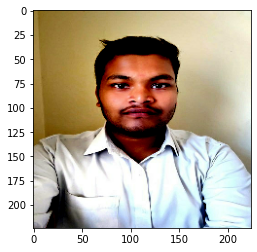

In [27]:
imgplot = plt.imshow(load_test_img())
imgplot

In [1]:
import cv2 # importing cv2 liberary

cam = cv2.VideoCapture(0)

count = 0

while True:
    ret, img = cam.read()

    cv2.imshow("Test", img)
 
    if not ret:
        break

    k=cv2.waitKey(1)

    if k%256==27:
        #For Esc key
        print("Close")
        break
    elif k%256==32:
        #For Space key

        print("Image "+str(count)+"saved")
        file='C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/'+str(count)+'.jpg'
        cv2.imwrite(file, img)
        count +=1
cam.release
cv2.destroyAllWindows

Image 0saved
Image 1saved
Image 2saved
Image 3saved
Image 4saved
Image 5saved
Image 6saved
Image 7saved
Image 8saved
Image 9saved
Image 10saved
Image 11saved
Image 12saved
Image 13saved
Image 14saved
Image 15saved
Image 16saved
Image 17saved
Close


<function destroyAllWindows>

In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [3]:
data = pd.read_csv("C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/players.csv")
data = data.sample(frac=1).reset_index(drop=True)

lab = preprocessing.LabelEncoder()
lab.fit(data['player'])
data['player_trans'] = lab.transform(data['player'])

In [4]:
data = data[:-6]
test_data = data[-6:]

In [5]:
for index,row in data.iterrows():
    if len(data[data['player']==row['player']])>20:
        data.drop(data[data['image']==row['image']].index , inplace=True)

In [6]:
load_model = keras.models.load_model("Evolv_ML.h5")

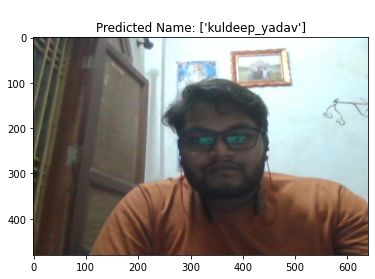

In [8]:
i=0
def load_test_img(image,player,player_transf):
    path = "C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/images/"+player+"/"+image
    img = tf.io.decode_jpeg(tf.io.read_file(path),channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224,500])
    img = keras.applications.mobilenet_v2.preprocess_input(img)
    return img
test_ds = tf.data.Dataset.from_tensor_slices((test_data.image.values,test_data.player.values,test_data.player_trans.values))
test_ds = test_ds.map(load_test_img).batch(6)
prediction = load_model.predict(test_ds)

#for index,row in test_data.iterrows():
img = tf.io.decode_jpeg(tf.io.read_file("C:/Users/ansug/OneDrive/Desktop/Internship_pending_task_21may/3.jpg"),channels=3)
imgplot = plt.imshow(img.numpy().astype("uint8"),aspect='auto')
real = str(list(lab.classes_)[row['player_trans']])
top_k_values, top_k_indices = tf.nn.top_k(prediction[i], k=3)
top_k_names = []
for k in range(1):
    top_k_names+=[str(list(lab.classes_)[top_k_indices[k]])]
plt.title("\nPredicted Name: "+str(top_k_names))
plt.show()
i+=1